### Ektraksi Fitur dengan TF-IDF

Support Vector Machine + TF-IDF

MEMUAT DATA
Jumlah data: 300
Jumlah fitur: 2
Kolom yang tersedia: ['Cleaned_Text', 'Label']
Distribusi Label:
Label
positive    100
neutral     100
negative    100
Name: count, dtype: int64

Contoh dataset:


,Cleaned_Text,Label
0,cerita kalo dijadiin wattpad novel film seru b...,positive
1,keren banget mimpi,positive
2,bahagia sedih tiara,positive
3,nonton ceritanya kak tiara seru banget mana ce...,positive
4,banyak cerita suka cerita,positive



PROSES TF-IDF VECTORIZATION
Dimensi fitur TF-IDF: (300, 1197)
Jumlah kosakata: 1197

PEMBAGIAN DATA TRAINING DAN TESTING
Data training: 240 sampel
Data testing: 60 sampel
Model berhasil dilatih!

EVALUASI MODEL
AKURASI: 0.7333 (73.33%)

CLASSIFICATION REPORT:
--------------------------------------------------
              precision    recall  f1-score   support

    negative       0.82      0.70      0.76        20
     neutral       0.64      0.70      0.67        20
    positive       0.76      0.80      0.78        20

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60


CONFUSION MATRIX:
--------------------------------------------------


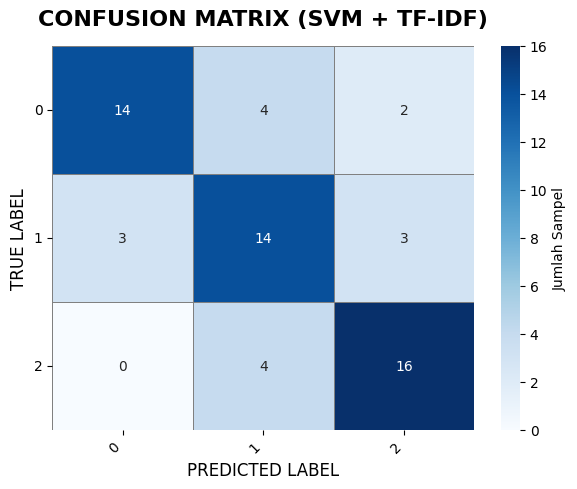

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. LOAD DATA
print("=" * 50)
print("MEMUAT DATA")
print("=" * 50)
data = pd.read_csv("Manual_label.csv", sep=';')

# Handle potential NaN values in 'Cleaned_Text' by filling them with empty strings
X_text = data["Cleaned_Text"].fillna('')
y = data["Label"]

# Menampilkan informasi dataset
print(f"Jumlah data: {len(data)}")
print(f"Jumlah fitur: {len(data.columns)}")
print(f"Kolom yang tersedia: {list(data.columns)}")
print(f"Distribusi Label:\n{y.value_counts()}")
print("\nContoh dataset:")
display(data.head())
print()

# 2. MENGHITUNG TF-IDF
print("=" * 50)
print("PROSES TF-IDF VECTORIZATION")
print("=" * 50)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X_text)
print(f"Dimensi fitur TF-IDF: {X.shape}")
print(f"Jumlah kosakata: {len(tfidf.vocabulary_)}")
print()

# 3. SPLIT DATA 80:20
print("=" * 50)
print("PEMBAGIAN DATA TRAINING DAN TESTING")
print("=" * 50)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data training: {X_train.shape[0]} sampel")
print(f"Data testing: {X_test.shape[0]} sampel")

# 4. TRAINING MODEL SVM
model = LinearSVC(random_state=42)
model.fit(X_train, y_train)
print("Model berhasil dilatih!")
print()

# 5. EVALUASI MODEL
print("=" * 50)
print("EVALUASI MODEL")
print("=" * 50)
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"AKURASI: {accuracy:.4f} ({accuracy*100:.2f}%)")
print()

print("CLASSIFICATION REPORT:")
print("-" * 50)
print(classification_report(y_test, y_pred))
print()

# CONFUSION MATRIX
print("CONFUSION MATRIX:")
print("-" * 50)
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())
plt.figure(figsize=(6, 5))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues',
            linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Jumlah Sampel'})

plt.title('CONFUSION MATRIX (SVM + TF-IDF)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('PREDICTED LABEL', fontsize=12)
plt.ylabel('TRUE LABEL', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Logistic Regresion + TF-IDF

MEMUAT DATA
Jumlah data: 300
Jumlah fitur: 2
Kolom yang tersedia: ['Cleaned_Text', 'Label']
Distribusi Label:
Label
positive    100
neutral     100
negative    100
Name: count, dtype: int64

Contoh dataset:


,Cleaned_Text,Label
0,cerita kalo dijadiin wattpad novel film seru b...,positive
1,keren banget mimpi,positive
2,bahagia sedih tiara,positive
3,nonton ceritanya kak tiara seru banget mana ce...,positive
4,banyak cerita suka cerita,positive



PROSES TF-IDF VECTORIZATION
Dimensi fitur TF-IDF: (300, 1197)
Jumlah kosakata: 1197

PEMBAGIAN DATA TRAINING DAN TESTING
Data training: 240 sampel
Data testing: 60 sampel

TRAINING MODEL LOGISTIC REGRESSION
Model Logistic Regression berhasil dilatih!

EVALUASI MODEL
AKURASI: 0.7167 (71.67%)

CLASSIFICATION REPORT:
--------------------------------------------------
              precision    recall  f1-score   support

    negative       0.78      0.70      0.74        20
     neutral       0.59      0.65      0.62        20
    positive       0.80      0.80      0.80        20

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60


CONFUSION MATRIX:
--------------------------------------------------


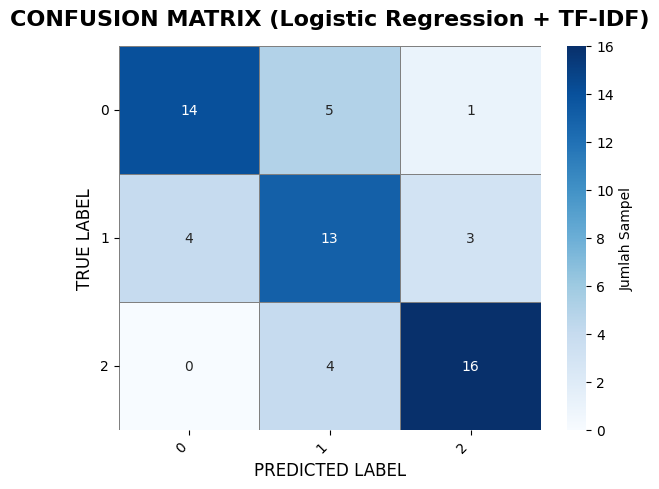

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. LOAD DATA
print("=" * 50)
print("MEMUAT DATA")
print("=" * 50)
data = pd.read_csv("Manual_label.csv", sep=';')

# Handle potential NaN values in 'Cleaned_Text' by filling them with empty strings
X_text = data["Cleaned_Text"].fillna('')
y = data["Label"]

# Menampilkan informasi dataset
print(f"Jumlah data: {len(data)}")
print(f"Jumlah fitur: {len(data.columns)}")
print(f"Kolom yang tersedia: {list(data.columns)}")
print(f"Distribusi Label:\n{y.value_counts()}")
print("\nContoh dataset:")
display(data.head())
print()

# 2. MENGHITUNG TF-IDF
print("=" * 50)
print("PROSES TF-IDF VECTORIZATION")
print("=" * 50)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X_text)
print(f"Dimensi fitur TF-IDF: {X.shape}")
print(f"Jumlah kosakata: {len(tfidf.vocabulary_)}")
print()

# 3. SPLIT DATA 80:20
print("=" * 50)
print("PEMBAGIAN DATA TRAINING DAN TESTING")
print("=" * 50)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data training: {X_train.shape[0]} sampel")
print(f"Data testing: {X_test.shape[0]} sampel")

# 4. TRAINING MODEL LOGISTIC REGRESSION
print("\n" + "=" * 50)
print("TRAINING MODEL LOGISTIC REGRESSION")
print("=" * 50)

# Training model Logistic Regression dengan parameter optimal
model = LogisticRegression(
    random_state=42,
    max_iter=1000,  # Pastikan konvergen
    solver='lbfgs',  # Solver yang baik untuk multiclass
    # multi_class='multinomial'  # Untuk klasifikasi multi-kelas
)

model.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih!")
print()

# 5. EVALUASI MODEL
print("=" * 50)
print("EVALUASI MODEL")
print("=" * 50)
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"AKURASI: {accuracy:.4f} ({accuracy*100:.2f}%)")
print()

print("CLASSIFICATION REPORT:")
print("-" * 50)
print(classification_report(y_test, y_pred))
print()

# CONFUSION MATRIX
print("CONFUSION MATRIX:")
print("-" * 50)
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())
# 6. VISUALISASI CONFUSION MATRIX
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Jumlah Sampel'})

plt.title('CONFUSION MATRIX (Logistic Regression + TF-IDF)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('PREDICTED LABEL', fontsize=12)
plt.ylabel('TRUE LABEL', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Ektraksi Fitur dengan BOW

Support Vector Machine + BOW

MEMUAT DATA
Jumlah data: 300
Jumlah fitur: 2
Kolom yang tersedia: ['Cleaned_Text', 'Label']
Distribusi Label:
Label
positive    100
neutral     100
negative    100
Name: count, dtype: int64

Contoh dataset:


,Cleaned_Text,Label
0,cerita kalo dijadiin wattpad novel film seru b...,positive
1,keren banget mimpi,positive
2,bahagia sedih tiara,positive
3,nonton ceritanya kak tiara seru banget mana ce...,positive
4,banyak cerita suka cerita,positive



PROSES BAG OF WORDS (BOW) VECTORIZATION
Dimensi matriks BOW: (300, 348)
Jumlah kosakata: 348

Contoh 20 fitur pertama:
['aaa' 'agama' 'air' 'ajak' 'ajar' 'akal' 'alam' 'alami' 'allah' 'alur'
 'ambil' 'ampun' 'anak' 'aneh' 'anggap' 'angkat' 'apa' 'asa' 'asli' 'ayah']

PEMBAGIAN DATA TRAINING DAN TESTING
Data training: 240 sampel
Data testing: 60 sampel

Sparsity BOW matrix:
- Total elemen: 83,520
- Elemen non-zero: 1,624
- Sparsity: 98.06%

Model berhasil dilatih!

EVALUASI MODEL
AKURASI: 0.6333 (63.33%)

CLASSIFICATION REPORT:
--------------------------------------------------
              precision    recall  f1-score   support

    negative       0.83      0.50      0.62        20
     neutral       0.52      0.60      0.56        20
    positive       0.64      0.80      0.71        20

    accuracy                           0.63        60
   macro avg       0.67      0.63      0.63        60
weighted avg       0.67      0.63      0.63        60


CONFUSION MATRIX:
---------------

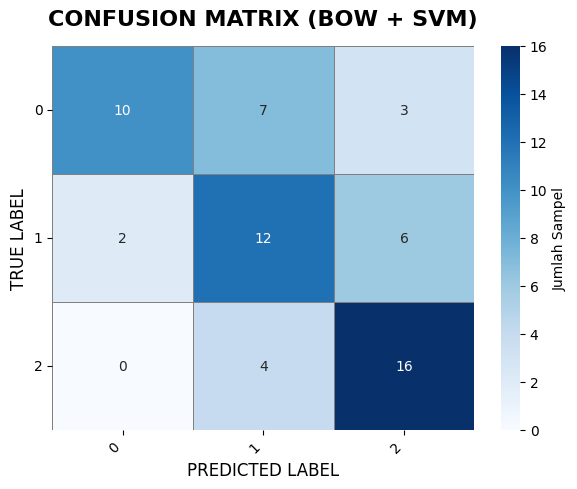

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer  # Ganti dari TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. LOAD DATA
print("=" * 50)
print("MEMUAT DATA")
print("=" * 50)
data = pd.read_csv("Manual_label.csv", sep=';')

# Handle potential NaN values in 'Cleaned_Text' by filling them with empty strings
X_text = data["Cleaned_Text"].fillna('')
y = data["Label"]

# Menampilkan informasi dataset
print(f"Jumlah data: {len(data)}")
print(f"Jumlah fitur: {len(data.columns)}")
print(f"Kolom yang tersedia: {list(data.columns)}")
print(f"Distribusi Label:\n{y.value_counts()}")
print("\nContoh dataset:")
display(data.head())
print()

# 2. MENGHITUNG BAG OF WORDS (BOW)
print("=" * 50)
print("PROSES BAG OF WORDS (BOW) VECTORIZATION")
print("=" * 50)

# Gunakan CountVectorizer untuk BOW
bow_vectorizer = CountVectorizer(
    max_features=5000,  # Batasi jumlah fitur (opsional)
    min_df=2,           # Kata harus muncul minimal 2 dokumen
    max_df=0.95         # Kata tidak boleh muncul di >95% dokumen
)

X = bow_vectorizer.fit_transform(X_text)
print(f"Dimensi matriks BOW: {X.shape}")
print(f"Jumlah kosakata: {len(bow_vectorizer.vocabulary_)}")
print()

# Menampilkan contoh kata yang dihasilkan
print("Contoh 20 fitur pertama:")
feature_names = bow_vectorizer.get_feature_names_out()
print(feature_names[:20])
print()

# 3. SPLIT DATA 80:20
print("=" * 50)
print("PEMBAGIAN DATA TRAINING DAN TESTING")
print("=" * 50)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data training: {X_train.shape[0]} sampel")
print(f"Data testing: {X_test.shape[0]} sampel")

# Tampilkan informasi sparsity
print(f"\nSparsity BOW matrix:")
print(f"- Total elemen: {X_train.shape[0] * X_train.shape[1]:,}")
print(f"- Elemen non-zero: {X_train.nnz:,}")
print(f"- Sparsity: {(1 - X_train.nnz / (X_train.shape[0] * X_train.shape[1])) * 100:.2f}%")

# 4. TRAINING MODEL SVM
model = LinearSVC(random_state=42)
model.fit(X_train, y_train)
print("\nModel berhasil dilatih!")
print()

# 5. EVALUASI MODEL
print("=" * 50)
print("EVALUASI MODEL")
print("=" * 50)
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"AKURASI: {accuracy:.4f} ({accuracy*100:.2f}%)")
print()

print("CLASSIFICATION REPORT:")
print("-" * 50)
print(classification_report(y_test, y_pred))
print()

# CONFUSION MATRIX
print("CONFUSION MATRIX:")
print("-" * 50)
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Jumlah Sampel'})

plt.title('CONFUSION MATRIX (BOW + SVM)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('PREDICTED LABEL', fontsize=12)
plt.ylabel('TRUE LABEL', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Logistic Regresion + BOW

MEMUAT DATA
Jumlah data: 300
Jumlah fitur: 2
Kolom yang tersedia: ['Cleaned_Text', 'Label']
Distribusi Label:
Label
positive    100
neutral     100
negative    100
Name: count, dtype: int64

Contoh dataset:


,Cleaned_Text,Label
0,cerita kalo dijadiin wattpad novel film seru b...,positive
1,keren banget mimpi,positive
2,bahagia sedih tiara,positive
3,nonton ceritanya kak tiara seru banget mana ce...,positive
4,banyak cerita suka cerita,positive



PROSES BAG OF WORDS (BOW) VECTORIZATION
Dimensi matriks BOW: (300, 348)
Jumlah kosakata: 348

Contoh 20 fitur pertama:
['aaa' 'agama' 'air' 'ajak' 'ajar' 'akal' 'alam' 'alami' 'allah' 'alur'
 'ambil' 'ampun' 'anak' 'aneh' 'anggap' 'angkat' 'apa' 'asa' 'asli' 'ayah']

PEMBAGIAN DATA TRAINING DAN TESTING
Data training: 240 sampel
Data testing: 60 sampel

Sparsity BOW matrix:
- Total elemen: 83,520
- Elemen non-zero: 1,624
- Sparsity: 98.06%

TRAINING MODEL LOGISTIC REGRESSION
Model Logistic Regression berhasil dilatih!

EVALUASI MODEL
AKURASI: 0.7000 (70.00%)

CLASSIFICATION REPORT:
--------------------------------------------------
              precision    recall  f1-score   support

    negative       0.81      0.65      0.72        20
     neutral       0.59      0.65      0.62        20
    positive       0.73      0.80      0.76        20

    accuracy                           0.70        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.71      0.70 

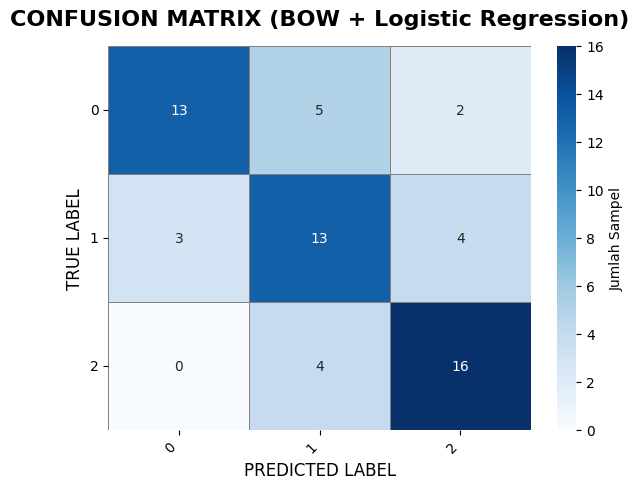

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer  # BOW
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. LOAD DATA
print("=" * 50)
print("MEMUAT DATA")
print("=" * 50)
data = pd.read_csv("Manual_label.csv", sep=';')

# Handle potential NaN values in 'Cleaned_Text' by filling them with empty strings
X_text = data["Cleaned_Text"].fillna('')
y = data["Label"]

# Menampilkan informasi dataset
print(f"Jumlah data: {len(data)}")
print(f"Jumlah fitur: {len(data.columns)}")
print(f"Kolom yang tersedia: {list(data.columns)}")
print(f"Distribusi Label:\n{y.value_counts()}")
print("\nContoh dataset:")
display(data.head())
print()

# 2. MENGHITUNG BAG OF WORDS (BOW)
print("=" * 50)
print("PROSES BAG OF WORDS (BOW) VECTORIZATION")
print("=" * 50)

# Gunakan CountVectorizer untuk BOW
bow_vectorizer = CountVectorizer(
    max_features=5000,  # Batasi jumlah fitur
    min_df=2,           # Kata harus muncul minimal 2 dokumen
    max_df=0.95         # Kata tidak boleh muncul di >95% dokumen
)

X = bow_vectorizer.fit_transform(X_text)
print(f"Dimensi matriks BOW: {X.shape}")
print(f"Jumlah kosakata: {len(bow_vectorizer.vocabulary_)}")
print()

# Menampilkan contoh kata yang dihasilkan
print("Contoh 20 fitur pertama:")
feature_names = bow_vectorizer.get_feature_names_out()
print(feature_names[:20])
print()

# 3. SPLIT DATA 80:20
print("=" * 50)
print("PEMBAGIAN DATA TRAINING DAN TESTING")
print("=" * 50)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data training: {X_train.shape[0]} sampel")
print(f"Data testing: {X_test.shape[0]} sampel")

# Tampilkan informasi sparsity
print(f"\nSparsity BOW matrix:")
print(f"- Total elemen: {X_train.shape[0] * X_train.shape[1]:,}")
print(f"- Elemen non-zero: {X_train.nnz:,}")
print(f"- Sparsity: {(1 - X_train.nnz / (X_train.shape[0] * X_train.shape[1])) * 100:.2f}%")
print()

# 4. TRAINING MODEL LOGISTIC REGRESSION
print("=" * 50)
print("TRAINING MODEL LOGISTIC REGRESSION")
print("=" * 50)

# Training model Logistic Regression
model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='lbfgs',
    # multi_class='multinomial'
)

model.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih!")
print()

# 5. EVALUASI MODEL
print("=" * 50)
print("EVALUASI MODEL")
print("=" * 50)
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"AKURASI: {accuracy:.4f} ({accuracy*100:.2f}%)")
print()

print("CLASSIFICATION REPORT:")
print("-" * 50)
print(classification_report(y_test, y_pred))
print()

# CONFUSION MATRIX
print("CONFUSION MATRIX:")
print("-" * 50)
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Jumlah Sampel'})

plt.title('CONFUSION MATRIX (BOW + Logistic Regression)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('PREDICTED LABEL', fontsize=12)
plt.ylabel('TRUE LABEL', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()